### 비지도 학습 : 머신러닝의 미래, 언제든 사용할 수 있음
- 입력데이터(x)만 존재, 출력(Y) 없음


In [1]:
# 221  10개의 숫자 이미지 광학 Character 글자 Recognization 인식
# 비지도 학습으로 숫자 인식을 할 수 있습니다.

In [2]:
#221 
from sklearn.datasets import load_digits # digit 숫자

In [3]:
digits = load_digits()

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits.target.shape # Y 예측 목표( 타켓)

(1797,)

In [7]:
digits.data.shape

(1797, 64)

In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
import matplotlib.pyplot as plt

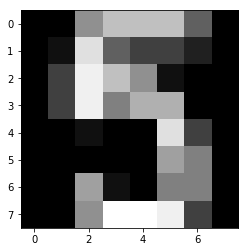

In [16]:
plt.imshow(digits.images[1010], cmap = 'gray')

In [ ]:
# 221 64 개의 명암값을 2개로 차원축소를 해서 2차원 에 산점도로 그려봅니다

In [22]:
from sklearn.decomposition import PCA
import mglearn

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
pca = PCA(n_components=2).fit(digits.data)

In [19]:
pca_x = pca.transform(digits.data)

In [20]:
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

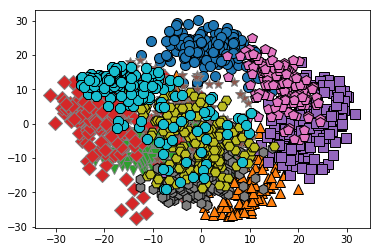

In [23]:
l = mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

In [24]:
# 223
from sklearn.manifold import TSNE

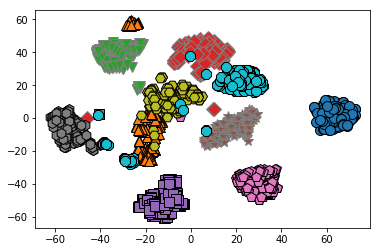

In [27]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], digits.target)

### 225 군딥(clustering) - 분류, 이상치 검출(Abnormal Detector)
- k 평균 군집
- 병합 군집
- DBSCAN (Density based Spatial clustering Aplication Noise) 밀도 공간


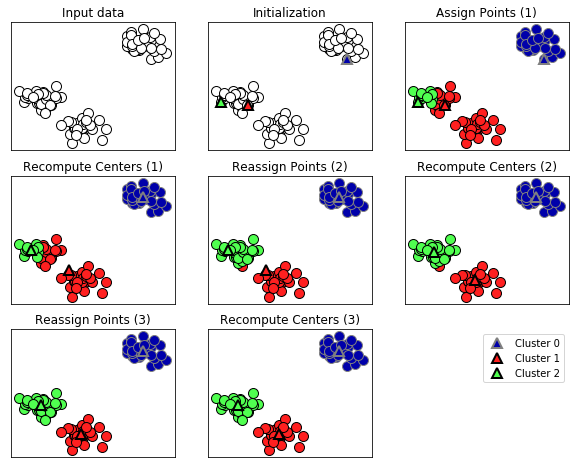

In [28]:
mglearn.plots.plot_kmeans_algorithm()

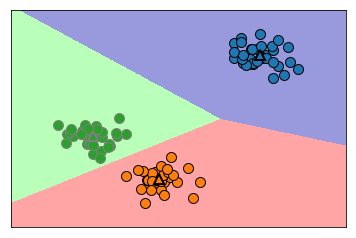

In [29]:
mglearn.plots.plot_kmeans_boundaries()

In [38]:
from sklearn.datasets import make_blobs
x, y = make_blobs()
x.shape, y.shape

((100, 2), (100,))

In [50]:
from sklearn.cluster import KMeans

In [67]:
km = KMeans(n_clusters=5).fit(x) # x를 3개로 그룹화(cluster)

In [68]:
km.predict(x) # x 가 몇번째 그룹이니?

array([0, 3, 1, 3, 1, 1, 0, 1, 4, 2, 2, 4, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3,
       3, 2, 3, 4, 2, 3, 4, 0, 4, 3, 0, 3, 4, 4, 4, 2, 1, 3, 1, 0, 2, 3,
       3, 3, 3, 1, 4, 1, 1, 4, 0, 4, 4, 2, 4, 1, 1, 3, 2, 3, 1, 0, 4, 4,
       1, 4, 4, 4, 4, 3, 2, 4, 2, 0, 3, 4, 3, 1, 3, 1, 0, 3, 3, 0, 1, 0,
       3, 1, 0, 3, 3, 1, 4, 3, 1, 0, 3, 1])

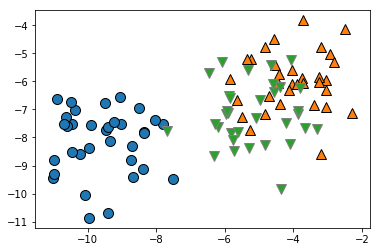

In [69]:
l = mglearn.discrete_scatter(x[:,0], x[:,1],y)

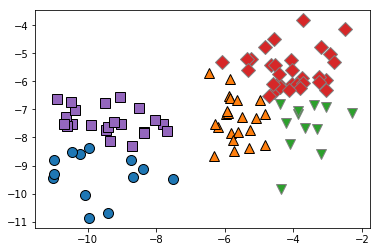

In [70]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], km.predict(x))

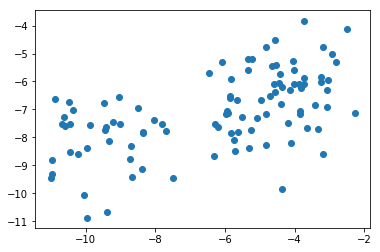

In [59]:
l =plt.scatter(x[:,0], x[:,1])

### digits 에 적용해보세요

- t-sne 로 2개의 차원으로 축소합니다.
- 그 에디터로 k-Means를 fit 합니다 k =10
- k-means의 예측을 산점도에서 표시합니다.

In [71]:
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits.data)

In [72]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [73]:
predict_group = km.predict(digits_tsne)

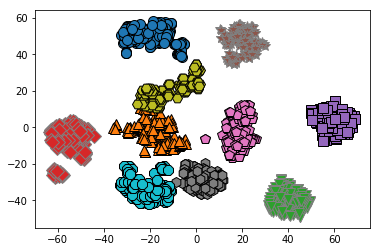

In [75]:
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

머신러닝 저장소 - 3위 와인데이터

와인의 질, 컬러, 알콜 도수 등을 츠정 -> 원산지 (3군데) 를 추정하는 문제

In [97]:
import pandas as pd
url = 'http://www.kbreport.com/main'
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [98]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [99]:
baseball = tables[0]
baseball


,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [100]:
# baseball.set_index('팀명', inplace =True) # 자체적으로 바꾸기
base = baseball.set_index('팀명')

In [101]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [102]:
data = base.drop(columns= '연속')
data.shape

(10, 8)

In [103]:
# 2 차원으로 변환한 후 k 개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 3)

In [106]:
# k means 로 클러스터링km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

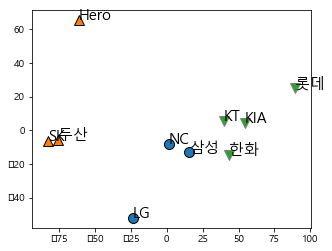

In [114]:
plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = (5,4))
plt.xlim(data_pca[:,0].min(), data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(), data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict = {'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1],group)

In [121]:
# 와인
wine = pd.read_csv('wine.data', header = None)
wine.shape

(178, 14)

In [122]:
y = wine[0]
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [123]:
pca = PCA(n_components=3).fit(wine)
wine_pca = pca.transform(wine)
km = KMeans(n_clusters=10).fit(wine_pca)
group = km.predict(wine_pca)

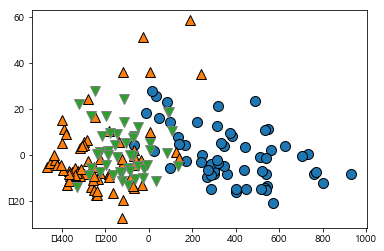

In [124]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], wine.iloc[:,0])

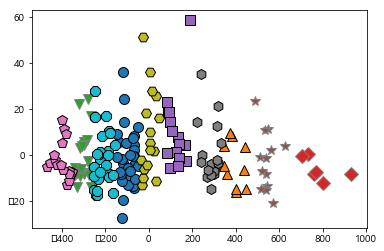

In [126]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], group)

### 대출상환 여부

1. get_dummy()로 purpose 원핫 인코딩
1. PCA로 2차원 축소
1. K-Means (2개) 로 그룹화
1. 산점도로 출력

In [129]:
loans = pd.read_csv('loans.csv')
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [130]:
x_pca = PCA(n_components=2).fit(loans_hot).transform(loans_hot) # 차원 축소
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

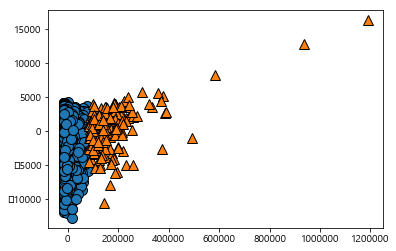

In [132]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group) # 예측

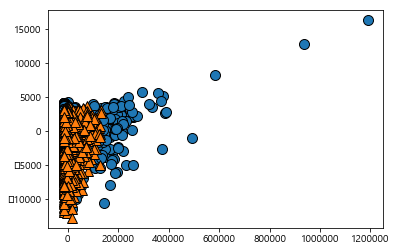

In [134]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans_hot.iloc[:,0]) # 실제로 돈 안갚는 사람